# CodeLab 3: Classifacton of WLANs power saving

Energy management is important for electronic devices, and doubly so for portable systems that run on battery power. For this Code Lab, we consider the problem of controlling the power state of the wireless network interface controller. For optimal performance, this power state should adapt to the network usage. We will use a dataset published alongside a paper by Saeed and Kolberg, 2018. The researchers measured the traffic signatures associated with a number of applications, on a mobile phone and labelled each according to the WLAN usage pattern. The dataset comprises 1350 samples with 6 features and a single classification label. The label (the type of usage) was assigned one of four categories: high, varied, buffer, or low. 

<br> In this Codelab we will start with binary classification, in which we will see the difference between weighted and non-weighted binary classification. Secondly, we will develop some multiclass models. There we will see the difference between one-versus-all  and multinomial classification. Various classification metrics will be used to assess the models’ prediction capabilities. 



In [1]:
# Import packages needed for the lab
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

<br> In this lab, we will work on different classifiers for different classification models. Even though the data is already prepared, it is important to get familiar with the data you will work with. 
<br> −Load “Network_Traffic.csv” into Pandas data frame. 

In [2]:
# Import the data and visualize it
data = pd.read_csv('Network_Traffic.csv')
data

,Receiving-data-rate-in-Kbytes-per-seconds,Transmitting-data-rate-in-Kbytes-per-seconds,Total-received-Kbytes,Total-Transmitted-Kbytes,Total-received-packets,Total-Transmitted-packets,Class
0,78.66,87.02,974.37,1000.00,1640,1540,High
1,94.52,91.51,1800.00,1870.00,3240,3040,High
2,69.89,76.95,2800.00,2900.00,5080,4700,High
3,131.25,156.25,3970.00,4140.00,7690,6760,High
4,106.64,115.82,4840.00,5070.00,9810,8400,High
...,...,...,...,...,...,...,...
1345,21.19,0.55,25000.00,439.16,19460,8410,Buffer
1346,11.28,0.10,25150.00,441.95,19580,8460,Buffer
1347,22.98,0.30,25310.00,444.59,19710,8520,Buffer
1348,25.00,0.10,25400.00,445.98,19770,8540,Buffer


## Task 1 - Data Preparation

<br> - 	Split the data frame into features data frame X and label data frame y.

In [23]:
# Seperate features from classes
X = data.iloc[0:1350, 0:6]
y = data.iloc[0:1350, 6]
X


,Receiving-data-rate-in-Kbytes-per-seconds,Transmitting-data-rate-in-Kbytes-per-seconds,Total-received-Kbytes,Total-Transmitted-Kbytes,Total-received-packets,Total-Transmitted-packets
0,78.66,87.02,974.37,1000.00,1640,1540
1,94.52,91.51,1800.00,1870.00,3240,3040
2,69.89,76.95,2800.00,2900.00,5080,4700
3,131.25,156.25,3970.00,4140.00,7690,6760
4,106.64,115.82,4840.00,5070.00,9810,8400
...,...,...,...,...,...,...
1345,21.19,0.55,25000.00,439.16,19460,8410
1346,11.28,0.10,25150.00,441.95,19580,8460
1347,22.98,0.30,25310.00,444.59,19710,8520
1348,25.00,0.10,25400.00,445.98,19770,8540


-Calculate and print the correlation matrix of X.

In [31]:
#Correlation matrix
corrMatrix = X.corr()
print(corrMatrix.to_string())
print(corrMatrix.size)

                                               Receiving-data-rate-in-Kbytes-per-seconds   Transmitting-data-rate-in-Kbytes-per-seconds   Total-received-Kbytes   Total-Transmitted-Kbytes   Total-received-packets   Total-Transmitted-packets
Receiving-data-rate-in-Kbytes-per-seconds                                       1.000000                                       0.748078                0.643117                   0.591491                 0.636381                    0.496000
 Transmitting-data-rate-in-Kbytes-per-seconds                                   0.748078                                       1.000000                0.681459                   0.639431                 0.681218                    0.545820
 Total-received-Kbytes                                                          0.643117                                       0.681459                1.000000                   0.935787                 0.981267                    0.820463
 Total-Transmitted-Kbytes               

-Plot the heat map of correlation matrix X using the Seaborn library (heatmap). 

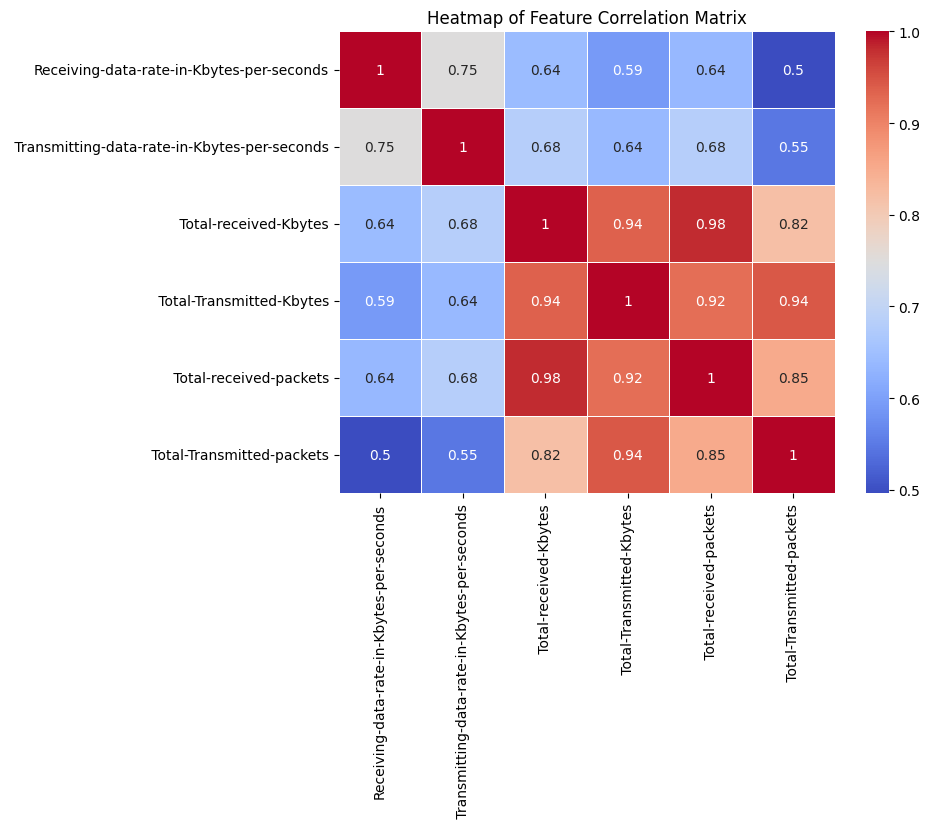

In [33]:
#Heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(corrMatrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Feature Correlation Matrix')
plt.show()

−Plot the 2 variables with the most correlation in a scatter plot.

Text(0.5, 1.0, 'Scatter Plot of  Total-received-packets vs  Total-received-Kbytes (Highest Correlation)')

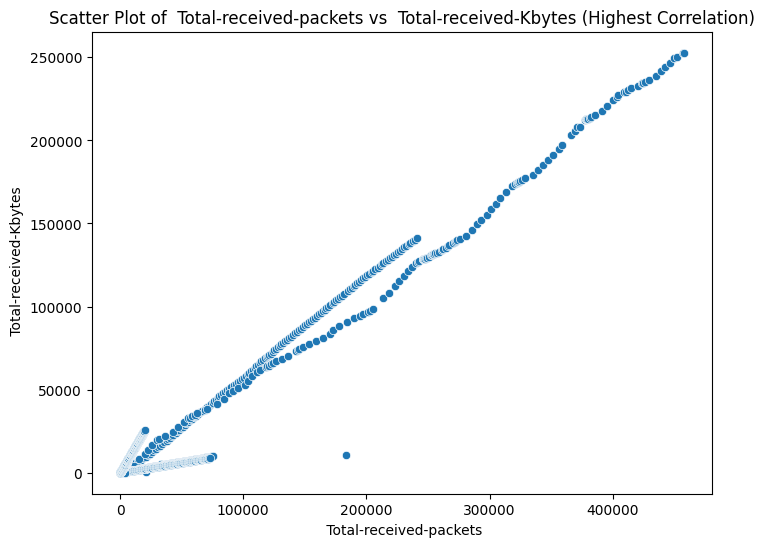

In [34]:
#Scatter plot
most_correlated_pair = corrMatrix.unstack().sort_values(ascending=False)
most_correlated_pair = most_correlated_pair[most_correlated_pair < 1].idxmax()
var1, var2 = most_correlated_pair
plt.figure(figsize=(8, 6))
sn.scatterplot(x=X[var1], y=X[var2])
plt.xlabel(var1)
plt.ylabel(var2)
plt.title(f'Scatter Plot of {var1} vs {var2} (Highest Correlation)')

-Create an array named “y_2c” for two class classification. Convert the samples with the high label as 1 and the rest as 0. 

In [36]:
# Creat one-versus-all with High as 1, all other are labeled 0
y_2c = y.apply(lambda label: 1 if label == 'High' else 0)
print(y_2c)

0       1
1       1
2       1
3       1
4       1
       ..
1345    0
1346    0
1347    0
1348    0
1349    0
Name:  Class, Length: 1350, dtype: int64


−	Calculate the ratio of high-class samples to all samples. 

In [ ]:
#Ratio of high-class 
ratio = ...
print(ratio)

-Create an array named “y_mc” that can be used for multiclass classification. Use numerical labels according to the class, as follows: 3-High, 2-Varied, 1-Low, 0-Buffer.

In [ ]:
# Create the Multi class y vector
y_mc = ...

−	Plot the distribution of labels in the data set using a bar plot. 

In [ ]:
#Plot the distribution of labels.
c_high = ...
c_var = ...
c_low = ...
c_buff = ...
plt.bar(...)

-Convert data frames X, y_2c, and  y_mc  to NumPy arrays (if they were Pandas objects). Convert the label vector elements to integers using the following notation, y.astype(‘int’), where y is the label vector.  

In [ ]:
# Convert to array
y_2c_data = ...
y_mc_data = ...
X_data = ...

-Scale the feature matrix X with the StandardScaler() function from Sklearn. 	

In [ ]:
#Scaling
scaler = ...

X_scaled = ...

Questions:
<br> 1) Which variables have the highest correlation? Does this make sense to you? Why?
<br> 2) What is the ratio of high-class labels in binary classification?
<br> 3) What is the share of each label in multiclass classification?
<br>4) Why might scaling improve the prediction capability of machine learning?


## Task 2: Binary classification with Logistic Regression

In the second task, you will develop a binary classifier (one versus all) to detect whether the wireless network is operating in high consumption mode or not. ML models will be tested based on 25% of the input data. You are free to develop your own functions using Sklearn functions for tasks like training, predicting, or performance evaluation. 

−	Split the data into training and test sets using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split. 

In [ ]:
#Train test split
Shuffle_state = 4720
X_train_2c, X_test_2c, y_train_2c, y_test_2c = ...

<br>−Develop and train a logistic regression model with default parameters. 
<br>−Use the trained model to predict test labels. 

In [ ]:
#Logistic regression
clf_lr = ...
y_prediction = ...

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [ ]:
#Performance metrics
Accuracy_LR = ...
F1_LR = ...
Precision_LR = ...
Recall_LR = ...
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))


−Plot the receiver operating characteristics (ROC) curve of training and test data in the same figure. By default, the logistic regression model uses a cut-off value of 0.5 to assign a positive or negative prediction to a data point. Different values can be used to bias the prediction towards negative or positive outcomes. The ROC curve plots the combinations of specificity and recall (sensitivity) that result from a range of cut-off values. 

In [ ]:
#ROC curve
ax = plt.gca()
test_disp = ...
train_disp = ...
plt.show()

−Generate and plot the confusion matrix.

In [ ]:
#Confusion Matrix
...

The class weight parameter adjusts the penalization factor of misclassified examples in model training. Depending on the application selection of weights varies. For example, in medical testing, the cost of false negatives (absence of a disease when it is present) outweighs the cost of false positives (incorrect indication of a disease when it is not present). In this binary classification, we need to modify the weights to reduce the number of missed high cases (false negatives).
<br> -Develop and train a logistic regression model using the “class_weight” parameter to reduce the number of false negatives in the test data (y_(2c_test)=1, but y_pred = 0). (Tip: In CodeLab2, we had constructed a SVM grid search. Similar to that, you don't have to try all the combinations yourself, you can build a nested loop and add a judgment statement at the end until you have a suitable result)
<br> -Print out the selected weights. 


In [ ]:
#Weighted logistic regression
w_0 = ...
w_1 = ...
clf_lr_w = ...
y_prediction_w =...
print(w_0)
print(w_1)

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [ ]:
#Performance metrics
Accuracy_LRw = ...
F1_LRw = ...
Precision_LRw = ...
Recall_LRw = ...
print("Accuracy: " + str(Accuracy_LRw))
print("F1 score: " + str(F1_LRw))
print("Recall score: " + str(Recall_LRw))
print("Precision score: " + str(Precision_LRw))


−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

In [ ]:
ax = plt.gca()
test_disp = ...
train_disp = ...

−Generate and plot the confusion matrix.

In [ ]:
...


<br>Questions :
<br>1) What differences do you find between train and test ROC curves in the logistic regression model?
<br>2) What does the confusion matrix represent?
<br>3) How do the weights influence the results of our classification in logistic regression?
<br>4) What metrics are good to use to compare models? How can you decide what is a good model?

## Task 3: Binary classification with SVM

In this task you will develop multiple support vector classifiers (SVC) for the binary classification task. 
<br> -Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. (Note: default kernel is RBF and must be changed to linear)

In [ ]:
clf_svmlin = ...
y_prediction_svmlin = ...

−Calculate and print the following performance metrics: Accuracy, recall, precision, and F1 score.

In [ ]:
#Performance metrics
Accuracy_svmlin = ...
F1_svmlin = ...
Precision_svmlin = ...
Recall_svmlin = ...
print("Accuracy: " + str(Accuracy_svmlin))
print("F1 score: " + str(F1_svmlin))
print("Recall score: " + str(Recall_svmlin))
print("Precision score: " + str(Precision_svmlin))

−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

In [ ]:
ax = plt.gca()
test_disp = ...
train_disp = ...

−Generate and plot the confusion matrix.

In [ ]:
...

Next step, you will investigate the impact of hyperparameters. The regularization parameter (C) adjusts the penalty factor for samples in training.
<br>-Develop two linear SVCs, one with parameter C as 0.0001 and one with C as 100, then train both models. (tol=1e-3)


In [ ]:
#SVC construction for C=0.0001 and C=100
clf_svmlin2 = ...
y_prediction_svmlin2 = ...

clf_svmlin3 = ...
y_prediction_svmlin3 =...

−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [ ]:
#Performance metrics C=0.0001
Accuracy_svmlin2 =...
F1_svmlin2 = ...
Precision_svmlin2 = ...
Recall_svmlin2 = ...
print("Accuracy: " + str(Accuracy_svmlin2))
print("F1 score: " + str(F1_svmlin2))
print("Recall score: " + str(Recall_svmlin2))
print("Precision score: " + str(Precision_svmlin2))

In [ ]:
#Performance metrics C=100
Accuracy_svmlin3 = ...
F1_svmlin3 = ...
Precision_svmlin3 = ...
Recall_svmlin3 = ...
print("Accuracy: " + str(Accuracy_svmlin3))
print("F1 score: " + str(F1_svmlin3))
print("Recall score: " + str(Recall_svmlin3))
print("Precision score: " + str(Precision_svmlin3))

−	Plot the receiver operating characteristic (ROC) curves for both cases separately.

In [ ]:
#ROC curve for C=0.0001
ax = plt.gca()
test_disp = ...
train_disp =...

In [ ]:
#ROC curve for C=0.0001
ax = plt.gca()
test_disp = ...
train_disp = ...

−	Generate and plot the confusion matrices for both cases separately.

In [ ]:
#Confusion matrix C=0.0001
...

In [ ]:
#Confusion matrix C=100
...

The other tunable hyperparameter is tolerance which adjusts the stopping criteria of the optimizer. 
<br>−	Develop and train a linear SVC with the given parameters [C=1.0, coef0=0.0, tol=10]. 


In [ ]:
#Tolerance 10
clf_svmlin4 = ...
y_prediction_svmlin4 = ...

In [ ]:
#Performance metrics tolerance 10
Accuracy_svmlin4 = ...
F1_svmlin4 = ...
Precision_svmlin4 = ...
Recall_svmlin4 = ...
print("Accuracy: " + str(Accuracy_svmlin4))
print("F1 score: " + str(F1_svmlin4))
print("Recall score: " + str(Recall_svmlin4))
print("Precision score: " + str(Precision_svmlin4))

−Plot receiver operating characteristics (ROC) curve of training and test data in the same figure.

In [ ]:
#ROC curve for tolerance 10
ax = plt.gca()
test_disp = ...
train_disp = ...

−Generate and plot the confusion matrix.

In [ ]:
#Confusion matrix tolerance 10
...

Kernels are decision functions applied to transform the feature space into higher dimensions. Nonlinear relationships between features can be found in high-dimensional space. In this CodeLab you will use a polynomial SVC (SVM classifier with a polynomial kernel). 
<br> −Develop and train two polynomial SVCs [kernel=’poly’] one with the degree of 3 and one with the degree of 2.  [C=1.0, coef0=0.0, tol=1e-3]. 

In [ ]:
#Polynomial SVM with 2nd and 3rd degree. 
clf_svmpoly1 = ...
y_prediction_svmpoly1 = ...

clf_svmpoly2 = ...
y_prediction_svmpoly2 = ...

−Calculate and print the following performance metrics for both cases: Accuracy, recall, precision, and F1 score.

In [ ]:
#Performance metrics polynomial 3rd 
Accuracy_svmpoly = ...
F1_svmpoly = ...
Precision_svmpoly = ...
Recall_svmpoly = ...
print("Accuracy: " + str(Accuracy_svmpoly))
print("F1 score: " + str(F1_svmpoly))
print("Recall score: " + str(Precision_svmpoly))
print("Precision score: " + str(Recall_svmpoly))

In [ ]:
#Performance metrics polynomial 2nd
Accuracy_svmpoly2 = ...
F1_svmpoly2 = ...
Precision_svmpoly2 = ...
Recall_svmpoly2 = ...
print("Accuracy: " + str(Accuracy_svmpoly2))
print("F1 score: " + str(F1_svmpoly2))
print("Recall score: " + str(Precision_svmpoly2))
print("Precision score: " + str(Recall_svmpoly2))

−	Generate and plot the confusion matrices for both cases separately.

In [ ]:
#Confusion matrix poly 3rd
...

In [ ]:
#Confusion matrix poly 2nd
...

Questions 
<br> 1) Compare linear SVM and logistic regression models.
<br> 2) What did you observe when parameter C is varied? Explain the role of parameter C in SVC.
<br> 3) What did you observe when tolerance is changed to 10? Explain the role of parameter tolerance in SVC.
<br> 4) Which SVM model do you prefer for this problem, polynomial or linear kernel?  Why? What is the potential benefit of using a nonlinear kernel? 
<br> 5) Rank the models from the highest performance to the lowest one with F1 scores.


## Task 4: Multi-class classification

Multi-class classification predicts the best among a set of labels (four, in this case). We consider two different model classes (logistic regression and SVM) and within the logistic regression model, both the One vs. All and the multi-class approach. 
<br> The One vs. All (called ‘one versus rest’ in sklearn) method constructs binary classifiers for each class. The final prediction is based on the model with the highest score or the largest (signed) distance from the classification boundary. 

<br>-Split the data (X, and y_mc) into training (75%) and test sets (25%) using the “train_test_split” function from Sklearn. Use 4720 as the random state parameter to control the split.  

In [ ]:
X_train_mc, X_test_mc, y_train_mc, y_test_mc = ...

-Develop and train a logistic regression model using the one vs. rest (parameter multi_class=’ovr’) method using the “y_mc” label vector. 

In [ ]:
clf_lr_ovr = ...
y_prediction_lrovr = ...

−	Calculate and print the accuracy of the model. 

In [ ]:
#Accuracy of OVR LR
Accuracy_lrovr = ...
print("Accuracy: " + str(Accuracy_lrovr))

−Generate and plot the confusion matrix.

In [ ]:
#Confusion matrix OVR LR
...

For logistic regression, we can also directly train a multi-class classifier using the multi-class cross-entropy loss (sklearn calls this the multinomial cross-entropy loss).  
<br>−Develop and train a multi-class logistic regression model (parameter multi_class=’multinomial’)


In [ ]:
clf_lr_mult = ...
y_prediction_lrmult = ...

−	Calculate and print the accuracy of the model. 

In [ ]:
#Accuracy of Mult LR
Accuracy_lrmult = ...
print("Accuracy: " + str(Accuracy_lrmult))

−Generate and plot the confusion matrix.

In [ ]:
#Confusion matrix mult LR
...

SVM can be used in multi-class classification tasks as well, but it will rely on the one-versus-all approach (or, for non-linear kernels, on the related one-versus-one approach). 

<br> - Develop and train a linear SVC [kernel=’linear’] as a one vs. all classifier with the given parameters [C=1.0, coef0=0.0, tol=1e-3]. 

In [ ]:
#OVR SVM
clf_svmlin_mc_ovr = ...
y_prediction_svmovr = ...

−	Calculate and print the accuracy of the model. 

In [ ]:
#Accuracy of SVM
Accuracy_svmovr = ...
print("Accuracy: " + str(Accuracy_svmovr))

−Generate and plot the confusion matrix.

In [ ]:
#Confusion matrix SVM OVR
...

Questions:
<br>1) How does the performance change for both classification methods for the logistic regression and why?
<br>2) Which classification method is more computationally demanding and why? 
<br>3) Why other classification metrics cannot be used directly in multi-class classification tasks?
<br>4) Why can multi-class classification be directly applied to logistic regression but not SVM?
<br>5) Compare all three models’ performance in multi-class classification.
<br>6) Which classes have higher mismatches in logistic regression? 
<br>7) Which classes have higher mismatches in SVM?  


### Bonus Task

Conduct a multi-class classification using only binary classifiers. You can use either logistic regression or SVM. Describe the steps you follow and how it works. Calculate each classifier’s output probabilities for the test data and plot them in ascending order.  